In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ge.csv', encoding='utf-8')
df.columns = ['Company', 'Star_Rating', 'Current_Employee', 'Work_Duration', 'Review_Title', 'Date_Posted', 'Job_\t\t\t\tTitle', 'Job_Location', 'Recommend', 'CEO_Approval', 'Business_Outlook', 'Pros', 'Cons', 'Advice_to_\t\t\tManagement']
df.columns = [c.replace(' ', '_') for c in df.columns]


In [3]:

df['Date_Posted'] = pd.to_datetime(df['Date_Posted'], dayfirst=True)


In [4]:
df = df[~(df['Date_Posted'] < '2016-01-01')]


In [5]:
quarters = pd.Series(pd.date_range('2016-01-01', '2022-12-31', freq='QS'))


In [6]:
aggregates = dict()
counts = dict()
count = 0
for q in quarters:
	aggregates[f'Q{count+1}'] = 0
	counts[f'Q{count+1}'] = 0
	count += 1

In [7]:
for idx, row in df.iterrows():
	for i in range(len(quarters)):
		if i < len(quarters) - 1:
			if row['Date_Posted'] >= quarters[i] and row['Date_Posted'] < quarters[i+1]:
				aggregates[f'Q{i+1}'] += row['Star_Rating']
				counts[f'Q{i+1}'] += 1

In [8]:
print(aggregates)
print(counts)

{'Q1': 1572.0, 'Q2': 1509.0, 'Q3': 1590.0, 'Q4': 1502.0, 'Q5': 1746.0, 'Q6': 1562.0, 'Q7': 1281.0, 'Q8': 1199.0, 'Q9': 929.0, 'Q10': 725.0, 'Q11': 654.0, 'Q12': 497.0, 'Q13': 511.0, 'Q14': 628.0, 'Q15': 948.0, 'Q16': 738.0, 'Q17': 672.0, 'Q18': 617.0, 'Q19': 1009.0, 'Q20': 1379.0, 'Q21': 2182.0, 'Q22': 1552.0, 'Q23': 1451.0, 'Q24': 1305.0, 'Q25': 1002.0, 'Q26': 0, 'Q27': 0, 'Q28': 0}
{'Q1': 422, 'Q2': 398, 'Q3': 413, 'Q4': 392, 'Q5': 466, 'Q6': 422, 'Q7': 352, 'Q8': 351, 'Q9': 281, 'Q10': 217, 'Q11': 188, 'Q12': 148, 'Q13': 148, 'Q14': 177, 'Q15': 250, 'Q16': 194, 'Q17': 171, 'Q18': 160, 'Q19': 252, 'Q20': 348, 'Q21': 571, 'Q22': 411, 'Q23': 365, 'Q24': 336, 'Q25': 256, 'Q26': 0, 'Q27': 0, 'Q28': 0}


In [9]:
average_ratings = []
quarts = []
for key, value in aggregates.items():
	if counts[key]!=0:
		avg_rating = value/counts[key]
		average_ratings.append(avg_rating)
		quarts.append(key)
		print(key, avg_rating)

Q1 3.7251184834123223
Q2 3.791457286432161
Q3 3.8498789346246975
Q4 3.8316326530612246
Q5 3.7467811158798283
Q6 3.7014218009478674
Q7 3.6392045454545454
Q8 3.415954415954416
Q9 3.306049822064057
Q10 3.3410138248847927
Q11 3.478723404255319
Q12 3.358108108108108
Q13 3.4527027027027026
Q14 3.5480225988700567
Q15 3.792
Q16 3.804123711340206
Q17 3.9298245614035086
Q18 3.85625
Q19 4.003968253968254
Q20 3.9626436781609193
Q21 3.821366024518389
Q22 3.776155717761557
Q23 3.9753424657534246
Q24 3.8839285714285716
Q25 3.9140625


In [10]:
print(average_ratings)
print(len(average_ratings))

[3.7251184834123223, 3.791457286432161, 3.8498789346246975, 3.8316326530612246, 3.7467811158798283, 3.7014218009478674, 3.6392045454545454, 3.415954415954416, 3.306049822064057, 3.3410138248847927, 3.478723404255319, 3.358108108108108, 3.4527027027027026, 3.5480225988700567, 3.792, 3.804123711340206, 3.9298245614035086, 3.85625, 4.003968253968254, 3.9626436781609193, 3.821366024518389, 3.776155717761557, 3.9753424657534246, 3.8839285714285716, 3.9140625]
25


In [11]:
def normalize_list(data):
	x_min = min(data)
	x_max = max(data)
	return [(x-x_min)/(x_max-x_min) for x in data]

In [12]:
norm_ratings = normalize_list(average_ratings)
print(norm_ratings)

print(len(norm_ratings))

[0.6004550706661816, 0.6955074435327934, 0.7792158620554841, 0.7530720023587429, 0.6314939879339229, 0.566501701072831, 0.47735481420301623, 0.1574748407066651, 0.0, 0.05009754897193364, 0.24741226810723463, 0.07459078835619125, 0.21012896913829693, 0.34670638536627035, 0.6962850610064545, 0.7136563049598889, 0.8937645301006707, 0.7883445296533864, 1.0, 0.9407888172625204, 0.7383616464295776, 0.673582863279403, 0.9589840489858867, 0.8280032779587627, 0.871180141033164]
25


Text(0, 0.5, 'Avg rating')

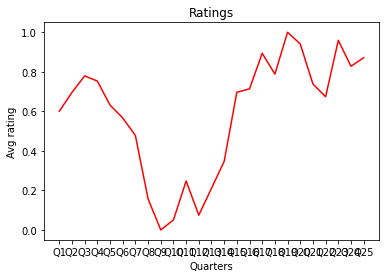

In [13]:
import matplotlib.pyplot as plt

plt.plot(quarts, norm_ratings, color = 'red')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('Avg rating')


# plt.show()

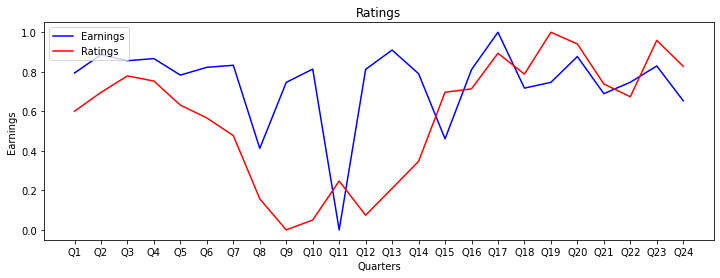

In [14]:
earnings = [
228,
2908,
2027,
2336,
-83,
1057,
1360,
-10820,
-1147,
800,
-22770,
761,
3588,
127,
-9423,
728,
6199,
-1987,
-1144,
2636,
-2802,
-1131,
1257,
-3843
]

# for i in range(2):
# 	earnings.insert(0, 0)
quarts = quarts[:-1]
norm_ratings = norm_ratings[:-1]
fig = plt.figure()
a = plt.plot(normalize_list(earnings), color = 'blue', label = 'Earnings')
plt.plot(quarts, norm_ratings, color = 'red', label	= 'Ratings')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('Earnings')
plt.legend(	loc = 'upper left')
fig.set_figwidth(12)

plt.show()

In [15]:

print(len(quarts))
print(len(norm_ratings))
print(len(normalize_list(earnings)))
final = pd.DataFrame(
    {'quarters': quarts,
     'ratings': norm_ratings,
     'earnings': normalize_list(earnings)
    })

final.head()

24
24
24


,quarters,ratings,earnings
0,Q1,0.600455,0.793883
1,Q2,0.695507,0.886396
2,Q3,0.779216,0.855984
3,Q4,0.753072,0.866651
4,Q5,0.631494,0.783148


In [16]:
corr = final['ratings'].corr(final['earnings'], method = 'pearson')
corr

0.275598370100528



Current lag: 0


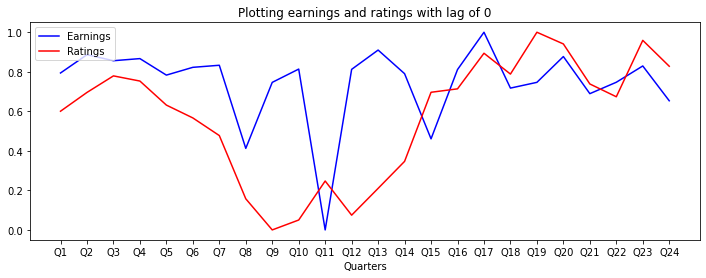

0.275598370100528


Current lag: 1


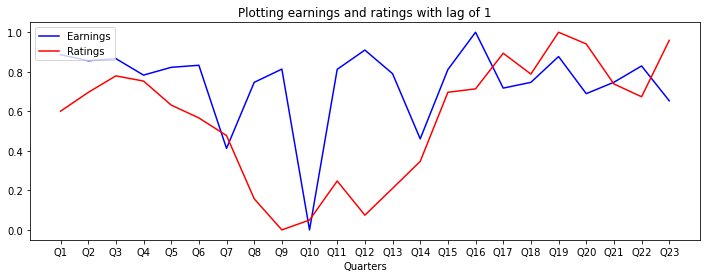

0.2987630853393008


Current lag: 2


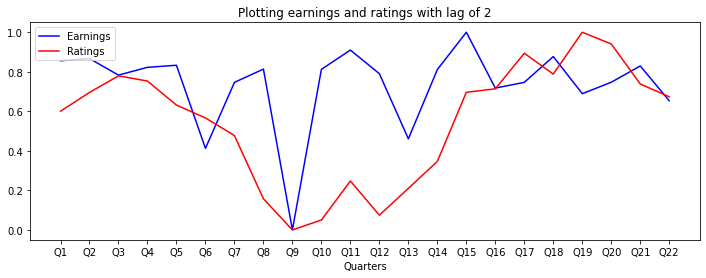

0.33828162607021245


Current lag: 3


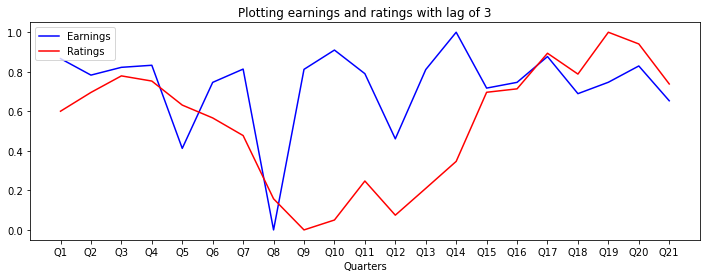

0.20899090653633198


Current lag: 4


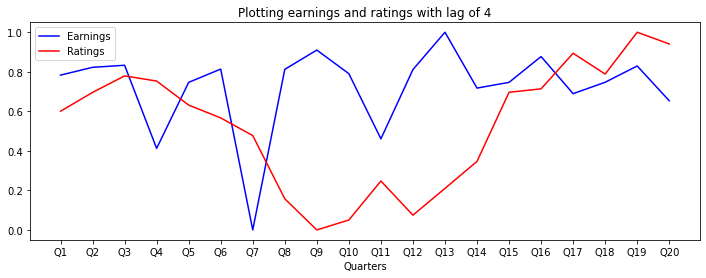

-0.11404996375474404


In [17]:
for lag in range(0, 5):
	print('\n\nCurrent lag:', lag)
	fig = plt.figure()
	a = plt.plot(normalize_list(earnings)[lag:], color = 'blue', label = 'Earnings')
	if lag == 0:
		q = quarts
		r = norm_ratings
	else:	
		q = quarts[:-lag]
		r = norm_ratings[:-lag]
	plt.plot(q, r, color = 'red', label	= 'Ratings')
	plt.title('Plotting earnings and ratings with lag of ' + str(lag))
	plt.xlabel('Quarters')
	plt.ylabel('')
	plt.legend(	loc = 'upper left')
	fig.set_figwidth(12)
	plt.show()

	final = pd.DataFrame(
    {'quarters': q,
     'ratings': r,
     'earnings': normalize_list(earnings)[lag:]
    })
	corr = final['ratings'].corr(final['earnings'],method = 'pearson')
	print(corr)

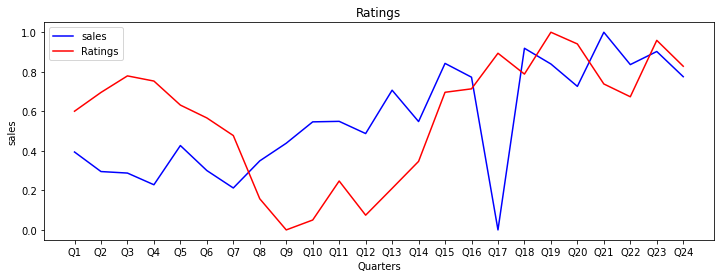

In [18]:
sales = [
27840,
30340,
29040,
32250,


26880,
29100,
30660,
12640,


27790,
29160,
23390,
26500,


22200,
23410,
23360,
21240,


19490,
16800,
18530,
21010,


17120,
18280,
18430,
20370

]

sales = sales[::-1]
# for i in range(2):
# 	earnings.insert(0, 0)

fig = plt.figure()
a = plt.plot(normalize_list(sales), color = 'blue', label = 'sales')
plt.plot(quarts, norm_ratings, color = 'red', label	= 'Ratings')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('sales')
plt.legend(	loc = 'upper left')
fig.set_figwidth(12)

plt.show()



Current lag: 0


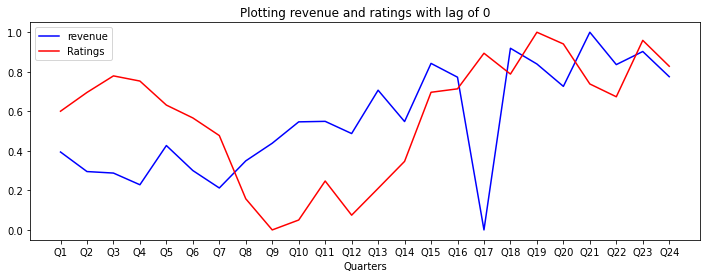

0.2399561875149906


Current lag: 1


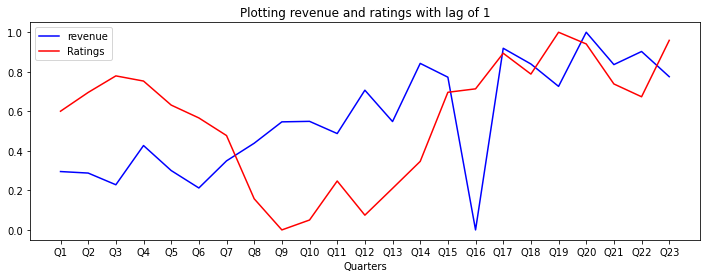

0.18691223802451257


Current lag: 2


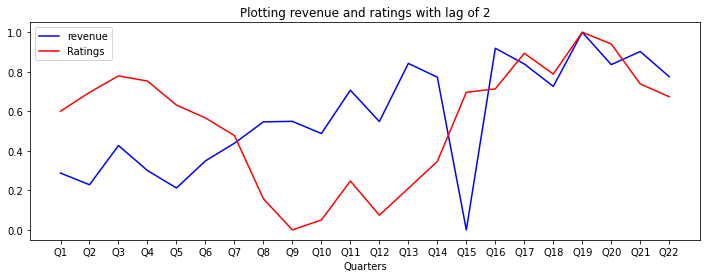

0.12112960519644433


Current lag: 3


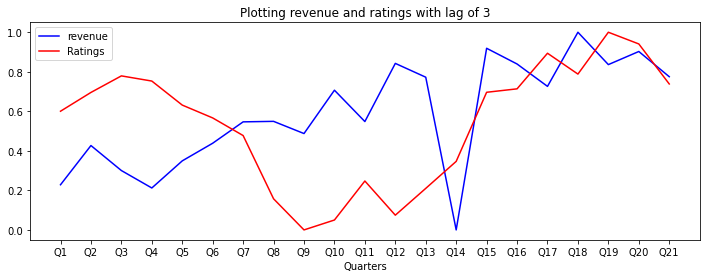

0.1548064740888014


Current lag: 4


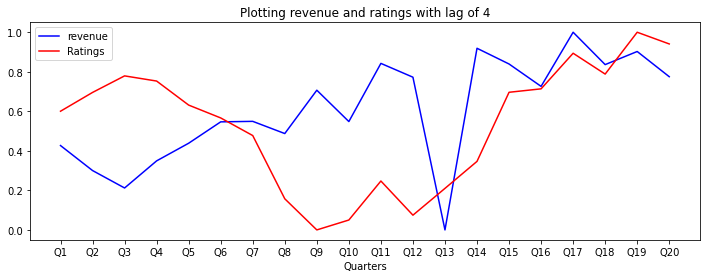

0.15677222223011142


In [19]:

for lag in range(0, 5):
    print('\n\nCurrent lag:', lag)
    fig = plt.figure()
    a = plt.plot(normalize_list(sales)[lag:], color = 'blue', label = 'revenue')
    if lag == 0:
        q = quarts
        r = norm_ratings
    else:
        q = quarts[:-lag]
        r = norm_ratings[:-lag]
    plt.plot(q, r, color = 'red', label	= 'Ratings')
    plt.title('Plotting revenue and ratings with lag of ' + str(lag))
    plt.xlabel('Quarters')
    plt.ylabel('')
    plt.legend(	loc = 'upper left')
    fig.set_figwidth(12)
    plt.show()

    final = pd.DataFrame(
    {'quarters': q,
     'ratings': r,
     'revenue': normalize_list(sales)[lag:]
    })
    corr = final['ratings'].corr(final['revenue'],method = 'pearson')
    print(corr)




In [20]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
def minmax_norm(data):
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled = scaler.fit_transform([[x] for x in data])
	return scaled

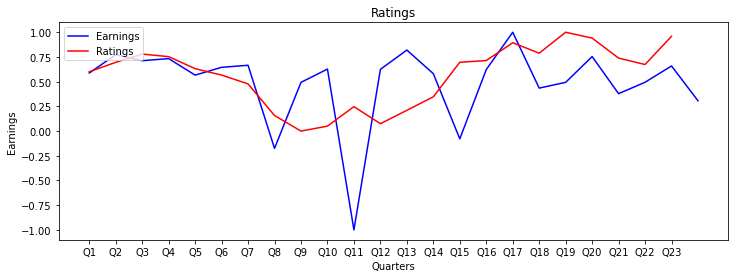

In [23]:
quarts = quarts[:-1]
norm_ratings = norm_ratings[:-1]
fig = plt.figure()
a = plt.plot(minmax_norm(earnings), color = 'blue', label = 'Earnings')
plt.plot(quarts, norm_ratings, color = 'red', label	= 'Ratings')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('Earnings')
plt.legend(	loc = 'upper left')
fig.set_figwidth(12)

plt.show()